## Importing Libraries

In [86]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score

## Loading Dataset

In [87]:
rawData = pd.read_csv('./healthcare-dataset-stroke-data.csv')
rawData.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


## Handling Null Values

In [88]:
rawData.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Replacing null values of bmi column using mean

In [89]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(rawData[['bmi']])

rawData['bmi'] = impute.transform(rawData[['bmi']])

In [90]:
smoking_status= dict((rawData['smoking_status']).value_counts())

In [91]:
import matplotlib.pyplot as plt
models=list(smoking_status.keys())
xpos=np.arange(len(models))

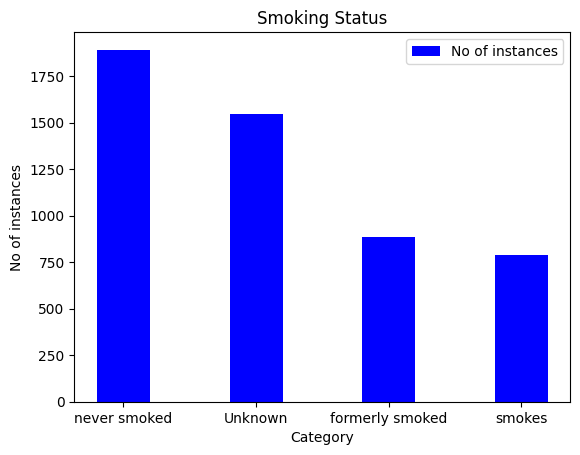

In [92]:
plt.xticks(xpos,models)
plt.title('Smoking Status')
plt.ylabel('No of instances')
plt.xlabel('Category')
plt.bar(xpos,list(smoking_status.values()),width=0.4,color='blue',label='No of instances')
plt.legend()

Removing 'unknown' coloumn of smoking_status column

In [93]:
rawData = rawData[rawData['smoking_status'] != 'Unknown']
rawData['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes'], dtype=object)

## Analyzing Features

### Structure of the Dataset

In [94]:
rawData.shape

(3566, 12)

In [95]:
rawData.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [96]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3566 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3566 non-null   int64  
 1   gender             3566 non-null   object 
 2   age                3566 non-null   float64
 3   hypertension       3566 non-null   int64  
 4   heart_disease      3566 non-null   int64  
 5   ever_married       3566 non-null   object 
 6   work_type          3566 non-null   object 
 7   Residence_type     3566 non-null   object 
 8   avg_glucose_level  3566 non-null   float64
 9   bmi                3566 non-null   float64
 10  smoking_status     3566 non-null   object 
 11  stroke             3566 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 362.2+ KB


In [97]:
rawData.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,3566.000000,3566.000000,3566.000000,3566.000000,3566.000000,3566.000000,3566.000000
mean,36785.750701,48.853898,0.125070,0.063937,108.982011,30.235208,0.056646
std,21239.999608,18.874375,0.330845,0.244675,48.292204,7.156410,0.231198
min,67.000000,10.000000,0.000000,0.000000,55.120000,11.500000,0.000000
25%,18042.750000,34.000000,0.000000,0.000000,77.460000,25.400000,0.000000
50%,37448.500000,50.000000,0.000000,0.000000,92.650000,28.893237,0.000000
75%,54984.250000,63.000000,0.000000,0.000000,116.677500,33.800000,0.000000
max,72915.000000,82.000000,1.000000,1.000000,271.740000,92.000000,1.000000


In [98]:
strokeStatus=dict(rawData['stroke'].value_counts())

In [99]:
import matplotlib.pyplot as plt
models=list(strokeStatus.keys())
xpos=np.arange(len(models))

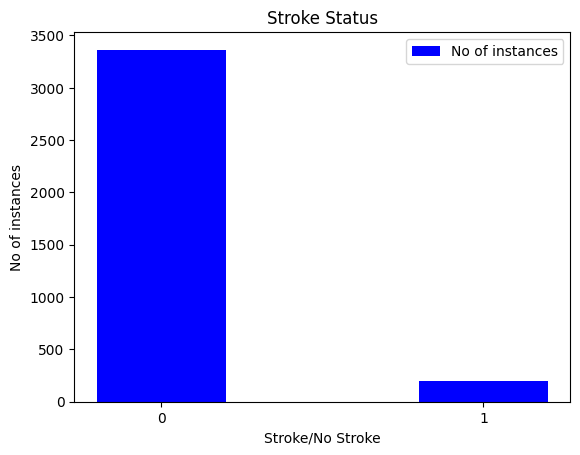

In [100]:
plt.xticks(xpos,models)
plt.title('Stroke Status')
plt.ylabel('No of instances')
plt.xlabel('Stroke/No Stroke')
plt.bar(xpos,list(strokeStatus.values()),width=0.4,color='blue',label='No of instances')
plt.legend()

### Categorical features

In [101]:
for i in rawData:
  #print(i)
  if rawData[i].dtypes == 'object':
    print(i,'=',rawData[i].unique())

gender = ['Male' 'Female' 'Other']
ever_married = ['Yes' 'No']
work_type = ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type = ['Urban' 'Rural']
smoking_status = ['formerly smoked' 'never smoked' 'smokes']


### Gender column Analysis

In [102]:
rawData["gender"].value_counts()

Female    2158
Male      1407
Other        1
Name: gender, dtype: int64

Droping gender "Other" rows as no of record is low

In [103]:
rawData.drop(rawData[rawData['gender'] == 'Other'].index, inplace=True)
rawData["gender"].value_counts()

Female    2158
Male      1407
Name: gender, dtype: int64

In [104]:
rawData.reset_index(inplace = True, drop=True)
rawData

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3560,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.700000,never smoked,0
3561,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
3562,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
3563,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0


## Preprocessing Dataset

### Standard Scaler on avg_glucose_level, bmi and age column

In [105]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
columns = ['avg_glucose_level','bmi','age']
scaled = std.fit_transform(rawData[['avg_glucose_level','bmi','age']])
scaled = pd.DataFrame(scaled,columns=columns)
rawData=rawData.drop(columns=columns,axis=1)
scaled

,avg_glucose_level,bmi,age
0,2.479202,0.889226,0.961273
1,1.930834,-0.187859,0.643316
2,-0.063211,0.316216,1.650179
3,1.289277,0.581757,0.007403
4,1.349126,-0.871730,1.597186
...,...,...,...
3560,-0.642849,-1.193174,0.431345
3561,-0.522324,-0.187859,1.650179
3562,0.336054,1.364404,1.703172
3563,-0.538062,0.050676,-0.734496


In [106]:
rawData=rawData.merge(scaled, left_index=True, right_index=True, how = "left")
rawData

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,avg_glucose_level,bmi,age
0,9046,Male,0,1,Yes,Private,Urban,formerly smoked,1,2.479202,0.889226,0.961273
1,51676,Female,0,0,Yes,Self-employed,Rural,never smoked,1,1.930834,-0.187859,0.643316
2,31112,Male,0,1,Yes,Private,Rural,never smoked,1,-0.063211,0.316216,1.650179
3,60182,Female,0,0,Yes,Private,Urban,smokes,1,1.289277,0.581757,0.007403
4,1665,Female,1,0,Yes,Self-employed,Rural,never smoked,1,1.349126,-0.871730,1.597186
...,...,...,...,...,...,...,...,...,...,...,...,...
3560,45010,Female,0,0,Yes,Private,Rural,never smoked,0,-0.642849,-1.193174,0.431345
3561,18234,Female,1,0,Yes,Private,Urban,never smoked,0,-0.522324,-0.187859,1.650179
3562,44873,Female,0,0,Yes,Self-employed,Urban,never smoked,0,0.336054,1.364404,1.703172
3563,19723,Female,0,0,Yes,Self-employed,Rural,never smoked,0,-0.538062,0.050676,-0.734496


### Feature scaling Age, BMI, Avg_glucose column

#### age Column

In [107]:
#rawData['age'] = pd.cut(rawData['age'], bins=[0, 13, 22, 40, 60, 100], labels=['Children', 'Teens', 'Adults', 'Middle-Aged', 'Elderly'])
#rawData["age"].unique()

In [108]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
#rawData["age"] = labelencoder.fit_transform(rawData["age"])

#### bmi Column

In [109]:
#rawData['bmi'] = pd.cut(rawData['bmi'], bins=[0, 19, 25, 30, 100], labels=['Underweight', 'Ideal', 'Overweight', 'Obesity']) #https://www.cdc.gov/obesity/basics/adult-defining.html
#rawData['bmi'].unique()

In [110]:
#rawData["bmi"] = labelencoder.fit_transform(rawData["bmi"])

#### avg_glucose_level Column

In [111]:
#rawData['avg_glucose_level'] = pd.cut(rawData['avg_glucose_level'], bins=[0, 90, 160, 230, 300], labels=['Low', 'Normal', 'High', 'Very High']) #https://www.cdc.gov/diabetes/basics/getting-tested.html
#rawData['avg_glucose_level'].unique()

In [112]:
#rawData["avg_glucose_level"] = labelencoder.fit_transform(rawData["avg_glucose_level"])

### Label Encoding Binary values

gender, ever_married, Residence_type Column

In [113]:
rawData["gender"] = labelencoder.fit_transform(rawData["gender"])
rawData["ever_married"] = labelencoder.fit_transform(rawData["ever_married"])
rawData["Residence_type"] = labelencoder.fit_transform(rawData["Residence_type"])

### One Hot Encoding of work_type and smoking_status

In [114]:
# Transform the category_desc column
#category_enc = pd.get_dummies(rawData['work_type'])
rawData = pd.get_dummies(rawData, columns = ['work_type', 'smoking_status'], drop_first = True)
# Take a look at the encoded columns
#category_enc.head()
rawData.head()


,id,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,avg_glucose_level,bmi,age,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
0,9046,1,0,1,1,1,1,2.479202,0.889226,0.961273,0,1,0,0,0,0
1,51676,0,0,0,1,0,1,1.930834,-0.187859,0.643316,0,0,1,0,1,0
2,31112,1,0,1,1,0,1,-0.063211,0.316216,1.650179,0,1,0,0,1,0
3,60182,0,0,0,1,1,1,1.289277,0.581757,0.007403,0,1,0,0,0,1
4,1665,0,1,0,1,0,1,1.349126,-0.871730,1.597186,0,0,1,0,1,0


### Dropping id

In [115]:
to_drop = ["id"]

rawData = rawData.drop(to_drop, axis=1)

### The Final Form Of The Dataset After Preprocessing 

In [116]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3565 entries, 0 to 3564
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       3565 non-null   int32  
 1   hypertension                 3565 non-null   int64  
 2   heart_disease                3565 non-null   int64  
 3   ever_married                 3565 non-null   int32  
 4   Residence_type               3565 non-null   int32  
 5   stroke                       3565 non-null   int64  
 6   avg_glucose_level            3565 non-null   float64
 7   bmi                          3565 non-null   float64
 8   age                          3565 non-null   float64
 9   work_type_Never_worked       3565 non-null   uint8  
 10  work_type_Private            3565 non-null   uint8  
 11  work_type_Self-employed      3565 non-null   uint8  
 12  work_type_children           3565 non-null   uint8  
 13  smoking_status_nev

In [117]:
rawData.head()

,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,avg_glucose_level,bmi,age,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
0,1,0,1,1,1,1,2.479202,0.889226,0.961273,0,1,0,0,0,0
1,0,0,0,1,0,1,1.930834,-0.187859,0.643316,0,0,1,0,1,0
2,1,0,1,1,0,1,-0.063211,0.316216,1.650179,0,1,0,0,1,0
3,0,0,0,1,1,1,1.289277,0.581757,0.007403,0,1,0,0,0,1
4,0,1,0,1,0,1,1.349126,-0.871730,1.597186,0,0,1,0,1,0


In [118]:
rawData.describe()

,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,avg_glucose_level,bmi,age,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
count,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3.565000e+03,3.565000e+03,3.565000e+03,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000
mean,0.394670,0.125105,0.063955,0.760168,0.508836,0.056662,-5.580700e-17,1.614417e-16,2.391729e-17,0.003927,0.640673,0.185975,0.019355,0.530715,0.221318
std,0.488848,0.330885,0.244707,0.427041,0.499992,0.231228,1.000140e+00,1.000140e+00,1.000140e+00,0.062552,0.479870,0.389141,0.137788,0.499126,0.415193
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.115215e+00,-2.618709e+00,-2.059316e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-6.525818e-01,-6.760680e-01,-7.874892e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-3.380159e-01,-1.878589e-01,6.039543e-02,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.594081e-01,4.979023e-01,7.493017e-01,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.370713e+00,8.631840e+00,1.756165e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot: >

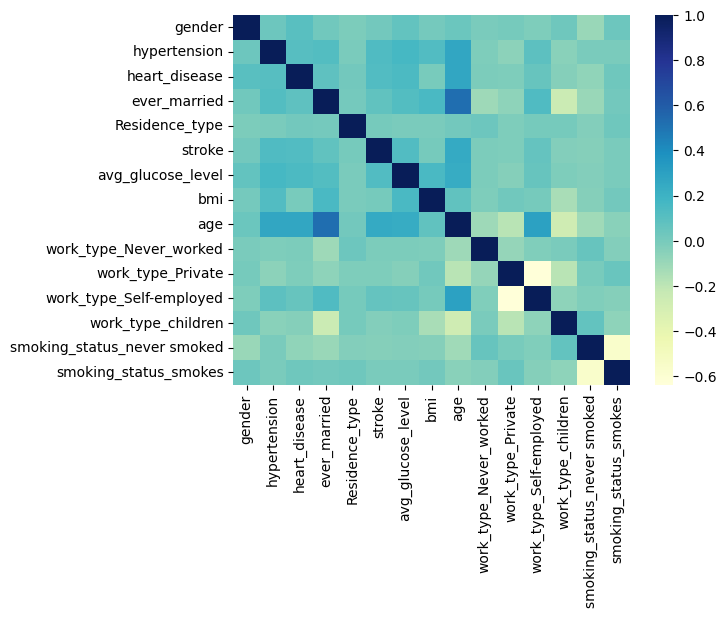

In [119]:
import seaborn as sns
corrRawData = rawData.corr()
sns.heatmap(corrRawData, cmap='YlGnBu')

<AxesSubplot: >

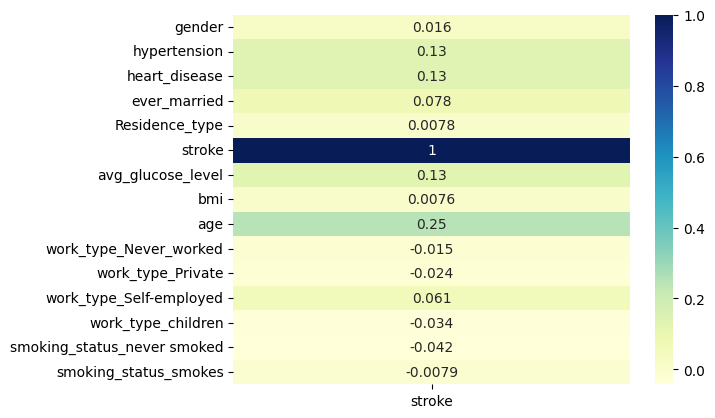

In [120]:
import seaborn as sns
corrRawData = rawData.corr()
corrRawData = pd.DataFrame(corrRawData, columns= ['stroke'])
sns.heatmap(corrRawData, cmap='YlGnBu', annot=True)

## Splitting Data into 80% train and 20% test

In [121]:
x = rawData.drop(['stroke'],axis=1)
y = rawData['stroke']

In [122]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [123]:
algo_accuracy = {}
algo_error = {}
precision = {}
recall = {}
f1Score = {}

## K-Nearest Neighbor

In [124]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [125]:
predictions = knn.predict(x_test)
print("Test set predictions:\n", predictions)

Test set predictions:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0

In [126]:
print("Training accuracy is {:.2f}".format(knn.score(x_train, y_train)) )
print("Testing accuracy is {:.2f} ".format(knn.score(x_test, y_test)) )

Training accuracy is 0.95
Testing accuracy is 0.93 


In [127]:
algo_accuracy['K-Nearest Neighbor'] = accuracy_score(y_test,predictions)
algo_error['K-Nearest Neighbor'] = 1-accuracy_score(y_test,predictions)
precision['K-Nearest Neighbor']=precision_score(y_test,predictions,zero_division=0)
recall['K-Nearest Neighbor']=recall_score(y_test,predictions,zero_division=0)
f1Score['K-Nearest Neighbor']=f1_score(y_test,predictions,zero_division=0)

In [128]:
print("K-Nearest Neighbor Accuracy: {:.2f}".format(algo_accuracy['K-Nearest Neighbor']))
print("K-Nearest Neighbor Error rate: {:.2f}".format(algo_error['K-Nearest Neighbor']))

K-Nearest Neighbor Accuracy: 0.93
K-Nearest Neighbor Error rate: 0.07


In [129]:
print(classification_report(y_test,predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       673
           1       0.00      0.00      0.00        40

    accuracy                           0.93       713
   macro avg       0.47      0.49      0.48       713
weighted avg       0.89      0.93      0.91       713



<AxesSubplot: >

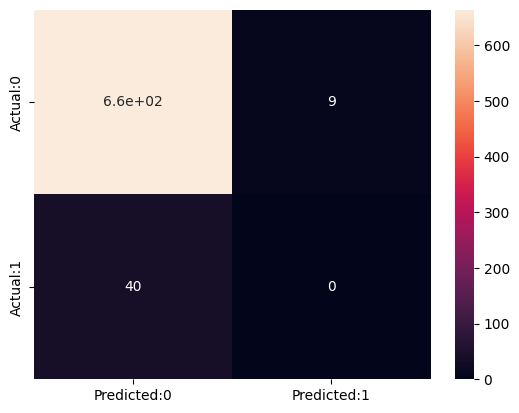

In [130]:
from seaborn import heatmap
heatmap(confusion_matrix(y_test,predictions) , xticklabels=['Predicted:0','Predicted:1'], yticklabels=['Actual:0','Actual:1'], annot=True)

## Decision Tree

In [131]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [132]:
predictions = clf.predict(x_test)
print("Test set predictions:\n", predictions)

Test set predictions:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0

In [133]:
print("Training accuracy is {:.2f}".format(clf.score(x_train, y_train)) )
print("Testing accuracy is {:.2f} ".format(clf.score(x_test, y_test)) )

Training accuracy is 1.00
Testing accuracy is 0.89 


In [134]:
algo_accuracy['Decision Tree'] = accuracy_score(y_test,predictions)
algo_error['Decision Tree'] = 1-accuracy_score(y_test,predictions)
precision['Decision Tree']=precision_score(y_test,predictions,zero_division=0)
recall['Decision Tree']=recall_score(y_test,predictions,zero_division=0)
f1Score['Decision Tree']=f1_score(y_test,predictions,zero_division=0)

In [135]:
print("Decision Tree Accuracy: {:.2f}".format(algo_accuracy['Decision Tree']))
print("Decision Tree Error rate: {:.2f}".format(algo_error['Decision Tree']))

Decision Tree Accuracy: 0.89
Decision Tree Error rate: 0.11


In [136]:
print(classification_report(y_test,predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       673
           1       0.10      0.12      0.11        40

    accuracy                           0.89       713
   macro avg       0.52      0.53      0.53       713
weighted avg       0.90      0.89      0.89       713



<AxesSubplot: >

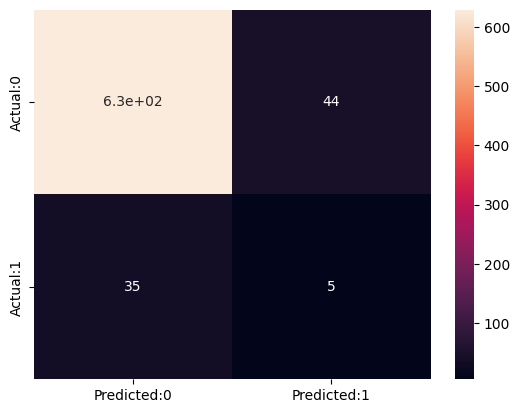

In [137]:
from seaborn import heatmap
heatmap(confusion_matrix(y_test,predictions) , xticklabels=['Predicted:0','Predicted:1'], yticklabels=['Actual:0','Actual:1'], annot=True)

## Support Vector Classifier

In [138]:
from sklearn.svm import SVC
svc = SVC(kernel="linear", random_state = 0)
svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [139]:
print("Training accuracy of the model is {:.2f}".format(svc.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(x_test, y_test)))

Training accuracy of the model is 0.94
Testing accuracy of the model is 0.94


In [140]:
predictions = svc.predict(x_test)
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [141]:
algo_accuracy['Support Vector Classifier'] = accuracy_score(y_test,predictions)
algo_error['Support Vector Classifier'] = 1-accuracy_score(y_test,predictions)
precision['Support Vector Classifier']=precision_score(y_test,predictions,zero_division=0)
recall['Support Vector Classifier']=recall_score(y_test,predictions,zero_division=0)
f1Score['Support Vector Classifier']=f1_score(y_test,predictions,zero_division=0)

In [142]:
print("Support Vector Classifier Accuracy: {:.2f}".format(algo_accuracy['Support Vector Classifier']))
print("Support Vector Classifier Error rate: {:.2f}".format(algo_error['Support Vector Classifier']))

Support Vector Classifier Accuracy: 0.94
Support Vector Classifier Error rate: 0.06


In [143]:
print(classification_report(y_test,predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       673
           1       0.00      0.00      0.00        40

    accuracy                           0.94       713
   macro avg       0.47      0.50      0.49       713
weighted avg       0.89      0.94      0.92       713



<AxesSubplot: >

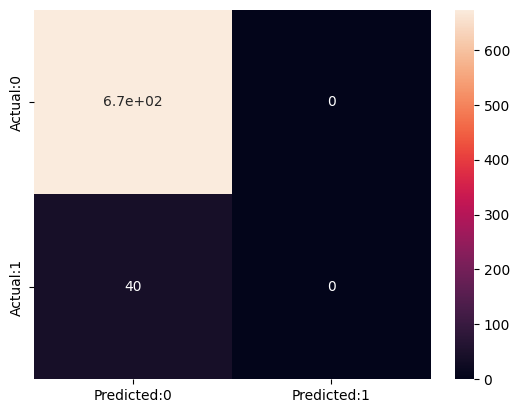

In [144]:
from seaborn import heatmap
heatmap(confusion_matrix(y_test,predictions) , xticklabels=['Predicted:0','Predicted:1'], yticklabels=['Actual:0','Actual:1'], annot=True)

## Logistic Regression

In [145]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=10000, random_state=42)
log.fit(x_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [146]:
predictions = log.predict(x_test)
print("Test set predictions:\n", predictions)

Test set predictions:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0

In [147]:
print("The Training accuracy of the model is {:.2f}".format(log.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(log.score(x_test, y_test)))

The Training accuracy of the model is 0.94
The Testing accuracy of the model is 0.94


In [148]:
algo_accuracy['Logistic Regression'] = accuracy_score(y_test,predictions)
algo_error['Logistic Regression'] = 1-accuracy_score(y_test,predictions)
precision['Logistic Regression']=precision_score(y_test,predictions,zero_division=0)
recall['Logistic Regression']=recall_score(y_test,predictions,zero_division=0)
f1Score['Logistic Regression']=f1_score(y_test,predictions,zero_division=0)
print("Logistic Regression Accuracy: {:.2f}".format(algo_accuracy['Logistic Regression']))
print("Logistic Regression Error rate: {:.2f}".format(algo_error['Logistic Regression']))

Logistic Regression Accuracy: 0.94
Logistic Regression Error rate: 0.06


In [149]:
print(classification_report(y_test,predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       673
           1       0.00      0.00      0.00        40

    accuracy                           0.94       713
   macro avg       0.47      0.50      0.49       713
weighted avg       0.89      0.94      0.92       713



<AxesSubplot: >

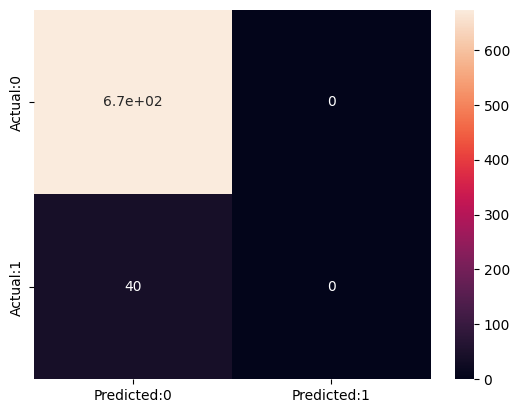

In [150]:
from seaborn import heatmap
heatmap(confusion_matrix(y_test,predictions) , xticklabels=['Predicted:0','Predicted:1'], yticklabels=['Actual:0','Actual:1'], annot=True)

## Neural Network Classifier

In [151]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(300,300,300), activation="relu", max_iter=1000000, random_state=21)
nnc.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(300, 300, 300), max_iter=1000000,
              random_state=21)

In [152]:
predictions = nnc.predict(x_test)
print("Test set predictions:\n", predictions)

Test set predictions:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0

In [153]:
print("The Training accuracy of the model is {:.2f}".format(nnc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(x_test, y_test)))

The Training accuracy of the model is 0.99
The Testing accuracy of the model is 0.92


In [154]:
algo_accuracy['Neural Network Classifier'] = accuracy_score(y_test,predictions)
algo_error['Neural Network Classifier'] = 1-accuracy_score(y_test,predictions)
precision['Neural Network Classifier']=precision_score(y_test,predictions,zero_division=0)
recall['Neural Network Classifier']=recall_score(y_test,predictions,zero_division=0)
f1Score['Neural Network Classifier']=f1_score(y_test,predictions,zero_division=0)
print("Neural Network Classifier Accuracy: {:.2f}".format(algo_accuracy['Neural Network Classifier']))
print("Neural Network Classifier Error rate: {:.2f}".format(algo_error['Neural Network Classifier']))

Neural Network Classifier Accuracy: 0.92
Neural Network Classifier Error rate: 0.08


In [155]:
print(classification_report(y_test,predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       673
           1       0.09      0.05      0.06        40

    accuracy                           0.92       713
   macro avg       0.52      0.51      0.51       713
weighted avg       0.90      0.92      0.91       713



<AxesSubplot: >

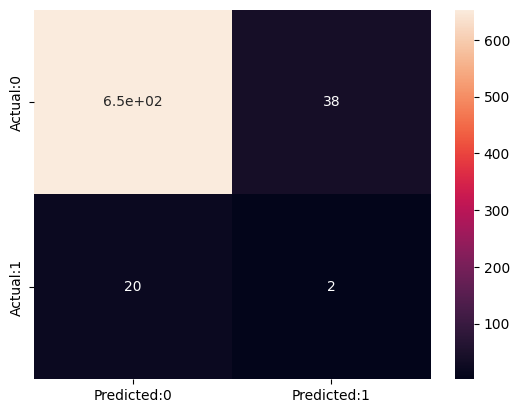

In [156]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
from seaborn import heatmap
heatmap(mat , xticklabels=['Predicted:0','Predicted:1'], yticklabels=['Actual:0','Actual:1'], annot=True)

## Algorithm Comparison

In [157]:
models=list(algo_accuracy.keys())
ypos=np.arange(len(models))

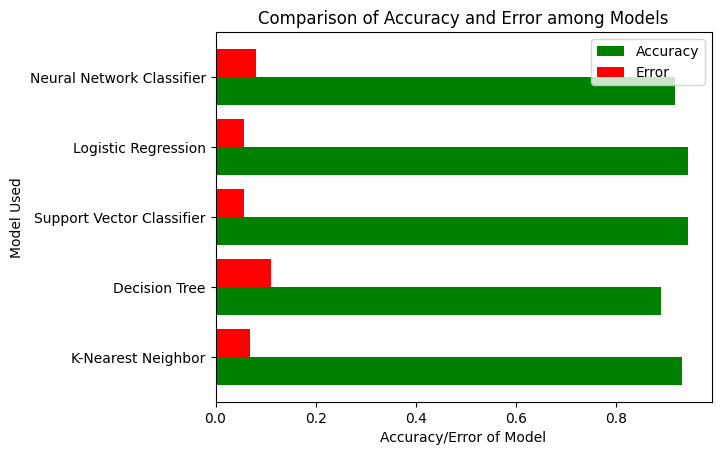

In [158]:
plt.yticks(ypos,models)
plt.title('Comparison of Accuracy and Error among Models')
plt.ylabel('Model Used')
plt.xlabel('Accuracy/Error of Model')
plt.barh(ypos-.2,list(algo_accuracy.values()),height=0.4,color='green',label='Accuracy')
plt.barh(ypos+.2,list(algo_error.values()),height=.4,color='red',label='Error')
plt.legend()

In [159]:
models=list(f1Score.keys())
ypos=np.arange(len(models))

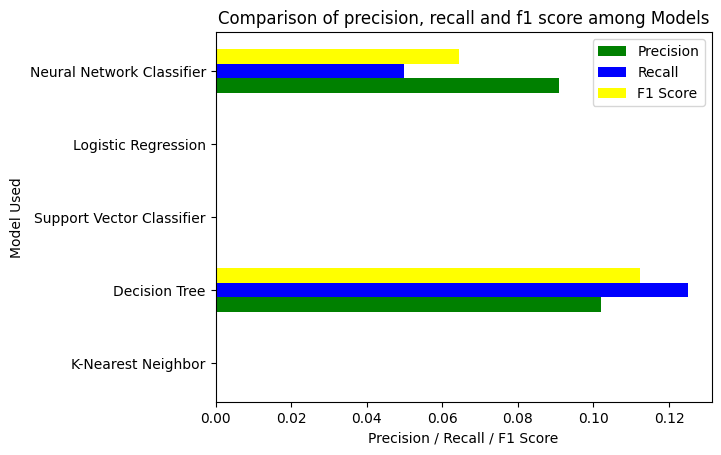

In [160]:
plt.yticks(ypos,models)
plt.title('Comparison of precision, recall and f1 score among Models')
plt.ylabel('Model Used')
plt.xlabel('Precision / Recall / F1 Score')
plt.barh(ypos-.2,list(precision.values()),height=0.2,color='green',label='Precision')
plt.barh(ypos,list(recall.values()),height=0.2,color='blue',label='Recall')
plt.barh(ypos+.2,list(f1Score.values()),height=0.2,color='yellow',label='F1 Score')
plt.legend()